# Week 8
- Joshua Burden
- DSC630 Predictive Analytics
- Bellevue University
- Andrew Hua
- 10/23/2022

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [57]:
#Import csv
df = pd.read_csv('us_retail_sales.csv')
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [56]:
#check types
df.dtypes

YEAR      int64
JAN       int64
FEB       int64
MAR       int64
APR       int64
MAY       int64
JUN       int64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [58]:
#check dataframe shape
df.shape

(30, 13)

In [11]:
#melt data and change to long df
df2 = pd.melt(df, id_vars='YEAR', value_vars=['JAN', 'FEB', 'MAR', 
                                              'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])


In [14]:
#Years to string
df2['YEAR'] = df2['YEAR'].astype(str)
df2['Date']= df2['variable'] + '-01-' + df2['YEAR']

df2['Date'] = pd.to_datetime(df2['Date'])

In [16]:
#remove NA and sort by date
df2.dropna(inplace=True)
df2 = df2.sort_values(by=['Date'])
df2

,YEAR,variable,value,Date
0,1992,JAN,146925.0,1992-01-01
30,1992,FEB,147223.0,1992-02-01
60,1992,MAR,146805.0,1992-03-01
90,1992,APR,148032.0,1992-04-01
120,1992,MAY,149010.0,1992-05-01
...,...,...,...,...
59,2021,FEB,504458.0,2021-02-01
89,2021,MAR,559871.0,2021-03-01
119,2021,APR,562269.0,2021-04-01
149,2021,MAY,548987.0,2021-05-01


In [60]:
df.reset_index(inplace = True)
df.head()

,level_0,index,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1,1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,2,2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,3,3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,4,4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


# 1.Plot the data with proper labeling and make some observations on the graph

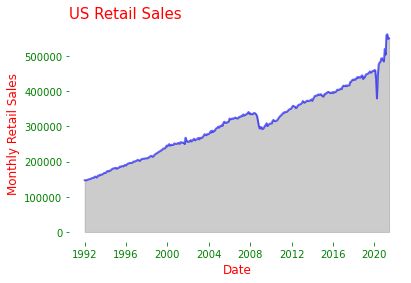

In [46]:
# Create an area chart
plt.fill_between(df2['Date'], df2['value'], color="grey", alpha=0.4)
plt.plot(df2['Date'], df2['value'], color="blue", alpha=0.6, linewidth=2)
plt.box(False)
plt.title('US Retail Sales', loc='left', fontsize=15, color='red')
plt.xlabel('Date', fontsize=12, color='red')
plt.ylabel('Monthly Retail Sales', fontsize=12, color='red')
plt.tick_params(axis='x', colors='green')
plt.tick_params(axis='y', colors='green')
plt.show()

US Retail sales have been steadily increasing since 1992. As you can see in the chart, small decreases in retail sales were seen during the housing crisis (2008-2009) and at the beggining of the pandemic (2020)

# 2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [30]:
# build a new predictor using a new feature created
df2['O-Date'] = pd.to_datetime(df2['Date'])
df2['O-Date'] = df2['O-Date'].map(datetime.toordinal)

In [31]:
#predictor for month
months = dict(JAN=1, FEB=2, MAR=3, APR=4, MAY=5, JUN=6, JUL=7, AUG=8, SEP=9, OCT=10, NOV=11, DEC=12)
df2['Month'] = df2['variable'].map(months)

In [32]:
#build out the training and test models and reshape the data fields
training = df2.iloc[0:341]
test = df2.iloc[342:354]

x_train = training[['O-Date', 'Month']]
y_train = training['value']
x_test = test[['O-Date', 'Month']]
y_test = test['value']


In [61]:
#Create the model
model = LinearRegression()
# Fit the model to the training set
model.fit(x_train, y_train)

LinearRegression()

# 4. Use the model to predict the monthly retail sales on the last year of data.

In [37]:
# predict the retail sales from last year
test_predictions = model.predict(x_test)
print(test_predictions)


[449165.16373623 450140.45597197 451115.74820772 452062.40506951
 453037.69730526 453984.35416705 453908.49868608 454883.79092182
 455773.1770357  456748.46927145 457695.12613323 458670.41836898]


# 5. Report the RMSE of the model predictions on the test set.

In [35]:
print('Test RMSE:', metrics.mean_squared_error(y_test, test_predictions, squared=False))

Test RMSE: 66817.27313121158


A significant dip and then spike in retail sales might be causing the increased RMSE